CSP 571 - DATA PREPARATION AND ANALYSIS

GROUP - 20

# 1. Data Exploration

### Load the dataset

In [ ]:
import pandas as pd

# Replace "filename.csv" with the actual name of the file you found
data = pd.read_csv('./lung-cancer-data/survey lung cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
label_enc = LabelEncoder()
data['GENDER'] = label_enc.fit_transform(data['GENDER'])  # M=1, F=0
data['LUNG_CANCER'] = label_enc.fit_transform(data['LUNG_CANCER'])  # YES=1, NO=0

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['LUNG_CANCER']))

# Separate target variable
target = data['LUNG_CANCER']

### Correlation Analysis

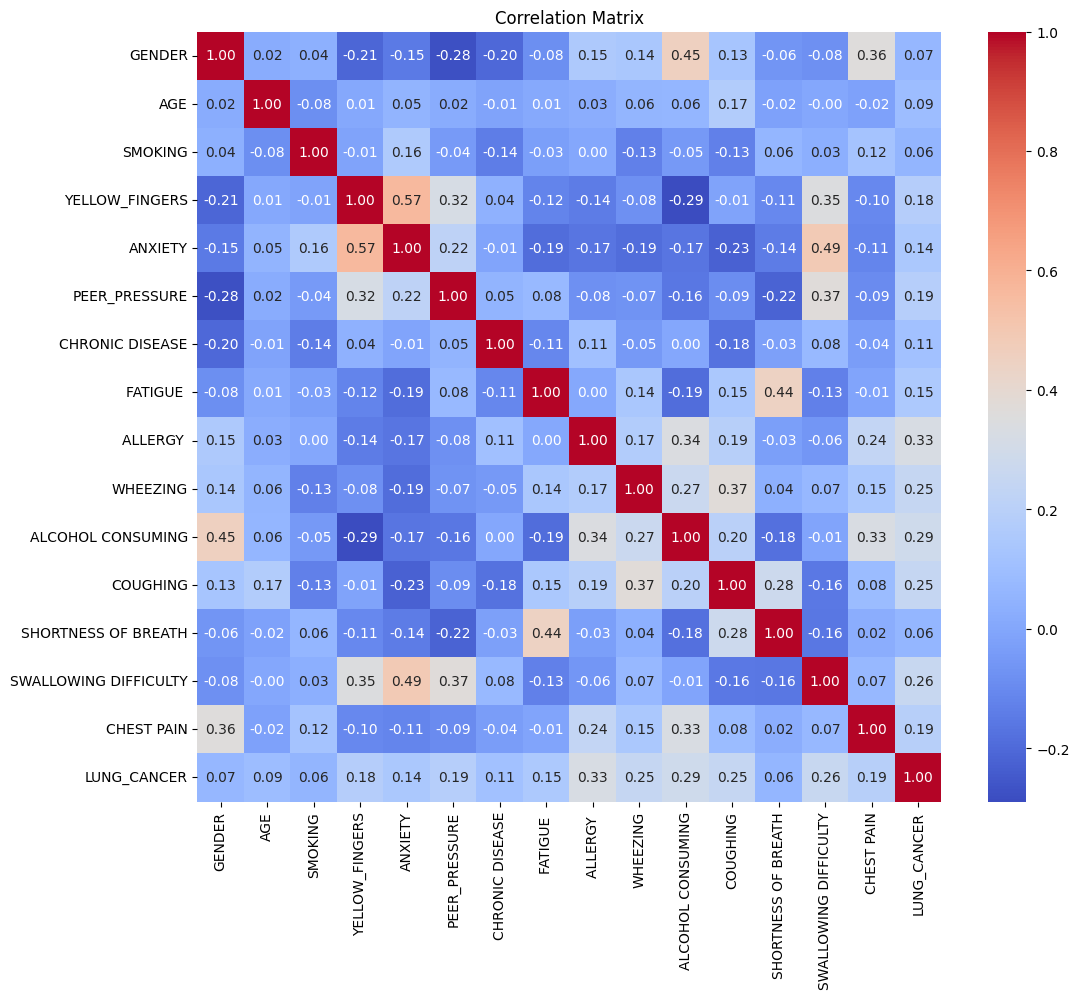

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 2. Visualization Strategies

### Dimensionality Reduction - PCA

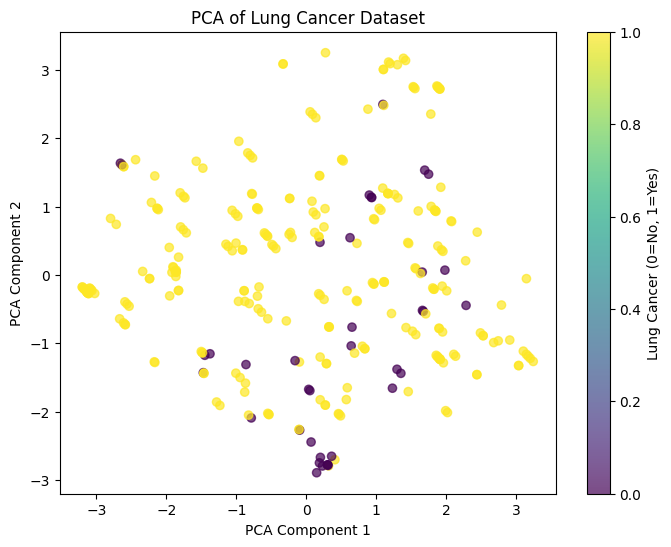

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=target, cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Lung Cancer Dataset')
plt.colorbar(label='Lung Cancer (0=No, 1=Yes)')
plt.show()

### Dimensionality Reduction - UMAP

/opt/homebrew/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


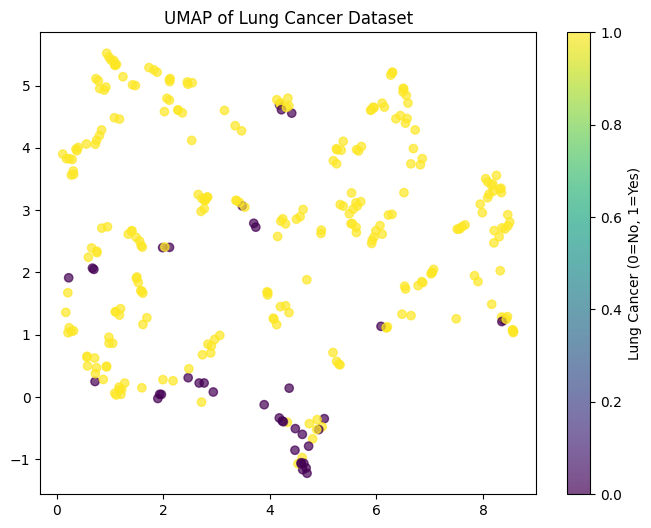

In [ ]:
# !pip show umap-learn
from umap.umap_ import UMAP

umap = UMAP(n_components=2, random_state=42)
umap_result = umap.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=target, cmap='viridis', alpha=0.7)
plt.title('UMAP of Lung Cancer Dataset')
plt.colorbar(label='Lung Cancer (0=No, 1=Yes)')
plt.show()

### Dimensionality Reduction - t-SNE

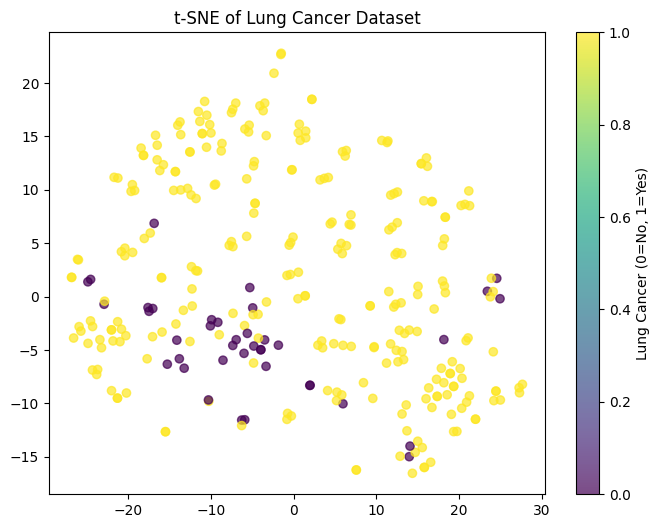

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=target, cmap='viridis', alpha=0.7)
plt.title('t-SNE of Lung Cancer Dataset')
plt.colorbar(label='Lung Cancer (0=No, 1=Yes)')
plt.show()

# 3. Unsupervised Learning

### Clusterning K - Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Evaluate clustering
silhouette_avg = silhouette_score(scaled_data, kmeans_labels)
print(f'Silhouette Score for KMeans: {silhouette_avg}')

Silhouette Score for KMeans: 0.13581381732675502


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 4. Cross-Validation Strategy

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42)

# Set up stratified k-fold cross-validation
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(log_reg, scaled_data, target, cv=stratified_kf, scoring='accuracy')

# Print results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-Validation Scores: [0.93548387 0.93548387 0.87096774 0.87096774 0.98360656]
Mean Cross-Validation Accuracy: 0.9193019566367001
Standard Deviation of CV Accuracy: 0.043199960649927885


# 5. Initial Model Training

### Simple Logistic Regression Model with Cross-Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define the model
log_reg = LogisticRegression(random_state=42)

# Cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(log_reg, scaled_data, target, cv=skf, scoring='accuracy')

print("Logistic Regression Cross-Validation Accuracy:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Logistic Regression Cross-Validation Accuracy: [0.93548387 0.93548387 0.87096774 0.87096774 0.98360656]
Mean CV Accuracy: 0.9193019566367001


# 6. Performance Improvement Experiments

### Experiment 1: Feature Selection using Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE

# Ensure the target column is excluded in the feature set
X = data.drop(columns=['LUNG_CANCER'])  # Original data features
y = target  # Target variable

# Standardize the features (scaling) - we already have this part
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Perform RFE (Recursive Feature Elimination)
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
rfe.fit(scaled_data, y)

# Get the selected features from the original data
selected_features = X.columns[rfe.support_]  # Using the original column names
print("Selected Features by RFE:", selected_features)

Selected Features by RFE: Index(['CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'COUGHING',
       'SWALLOWING DIFFICULTY'],
      dtype='object')


### Experiment 2: Regularization with Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier

ridge_model = RidgeClassifier(alpha=1.0, random_state=42)
cv_scores_ridge = cross_val_score(ridge_model, scaled_data, target, cv=skf, scoring='accuracy')

print("Ridge Classifier Cross-Validation Accuracy:", cv_scores_ridge)
print("Mean CV Accuracy for Ridge:", cv_scores_ridge.mean())

Ridge Classifier Cross-Validation Accuracy: [0.91935484 0.90322581 0.87096774 0.87096774 0.96721311]
Mean CV Accuracy for Ridge: 0.9063458487572713


# 7. Result Analysis

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores_rf = cross_val_score(rf_model, scaled_data, target, cv=skf, scoring='accuracy')

print("Random Forest Cross-Validation Accuracy:", cv_scores_rf)
print("Mean CV Accuracy for Random Forest:", cv_scores_rf.mean())

Random Forest Cross-Validation Accuracy: [0.9516129  0.87096774 0.87096774 0.87096774 0.96721311]
Mean CV Accuracy for Random Forest: 0.9063458487572713
